# DME - Data Mining and Exploration (INFR 11007) Review

> This is my review note of the DME course ([Data Mining and Exploration (INFR11007)](https://www.inf.ed.ac.uk/teaching/courses/dme/), 2019) at the University of Edinburgh. Remeber to read the 'Lab' section of each chapter

<img src="assets/DME_process.png" alt="Data Analysis Process" title="Data Analysis Process" style="width: 75%;"/>
<div class="has-text-centered is-size-6 has-text-grey caption" style="text-align:center">Data Analysis Process</div>

## Exploratory Data Analysis

### Numberical Data Description

#### Location
* **Non-robust Measure**
    * Sample Mean (arithmetic mean or average): $\hat{x} = \frac{1}{n}\sum_{i=1}^{n} x_{i}$
        * for random variable: $\mathbb{E}[x] = \int xp(x) dx$

* **Robust Measure**
    * Median: 
    $$
    median(x) = 
    \begin{cases}
    x_{[(n+1)\mathbin{/}2]}& \text{; if $n$ is odd}\\
    \frac{1}{2}[x_{(n\mathbin{/}2)}+x_{(n\mathbin{/}2)+1}]& \text{; if $n$ is even}            
    \end{cases}
    $$

    * Mode: Value that occurs most frequent
    * $\alpha_{th}$ Sample Quantile (rough data point, i.e. $q_{\alpha} \approx x_{([n\alpha])}$)
        * $Q_{1} = q_{0.25}$, $Q_{2} = q_{0.5}$, $Q_{3} = q_{0.75}$
        
---
**Example**
<!-- - Set 1 = [0, 1, 1, 1, 2, 3, 4, 4, 5, 9]
- Set 2 = [0, 1, 1, 1, 2, 3, 4, 4, 5, 9000] -->

<!-- | DataSet | Mean | Median | $Q_{1}$ | $Q_{3}$ |
| ------- |:----:|:------:|:-------:|:-------:|
| Data 1  | 3.0  | 2.5    | 1.0     | 4.0     |
| Data 2  | 902.1| 2.5    | 1.0     | 4.0     | -->

In [1]:
import numpy as np
import pandas as pd

set1 = np.array([0, 1, 1, 1, 2, 3, 4, 4, 5, 9])
set2 = np.array([0, 1, 1, 1, 2, 3, 4, 4, 5, 9000])
print('Set 1: {}'.format(', '.join(list(map(str, set1)))))
print('Set 2: {}'.format(', '.join(list(map(str, set2)))))

d = {
    'mean': [set1.mean(), set2.mean()], 
    'median': [np.median(set1), np.median(set2)], 
    '$Q_1$': [np.quantile(set1, 0.25), np.quantile(set2, 0.25)], 
    '$Q_2$': [np.quantile(set1, 0.5), np.quantile(set2, 0.5)], 
    '$Q_3$': [np.quantile(set1, 0.75), np.quantile(set2, 0.75)]
}

pd.DataFrame(data=d, index=['Set 1','Set 2'])

Set 1: 0, 1, 1, 1, 2, 3, 4, 4, 5, 9
Set 2: 0, 1, 1, 1, 2, 3, 4, 4, 5, 9000


,mean,median,$Q_1$,$Q_2$,$Q_3$
Set 1,3.0,2.5,1.0,2.5,4.0
Set 2,902.1,2.5,1.0,2.5,4.0


#### Scale
* **Non-robust Measure**
    * Sample Variance: $Var(x) = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \hat{x})^2$
        * for random variable: $Var[x] = \int [x-\mathbb{E}[x]]^2 dx$
    * Standard Deviation: $Std(x) = \sqrt{Var(x)}$

* **Robust Measure**
    * Median Absolute Deviation(MAD): $$MAD(x) = median[|x_{i} - median(x)|]$$
    * IQR(interquartile range): $$IQR = Q_{3} - Q_{1}$$


In [2]:
from scipy.stats import iqr

def mad(x):
    return np.median(np.abs(x - np.median(x)))

d = {
    'variance': [set1.var(), set2.var()], 
    'std': [set1.std(), set2.std()], 
    'MAD': [mad(set1), mad(set2)], 
    'IQR': [iqr(set1), iqr(set2)]
}
pd.DataFrame(data=d, index=['Set 1','Set 2'])

,variance,std,MAD,IQR
Set 1,6.40,2.529822,1.5,3.0
Set 2,7286222.89,2699.300445,1.5,3.0


#### Shape:
* **Non-robust Measure**
    * Skewness: measures the asymmetry of data $$skew(x) = \frac{1}{n} \sum_{i=1}^{n}[\frac{x_{i}-\hat{x}}{std(x)}]^{3}$$ 
    * Kurtosis: measures how heavy the tails of distribution are, in other word, measures how often x takes on values that are considerable larger or smaller than its standard deviation.
    $$kurt(x) = \frac{1}{n} \sum_{i=1}^{n}[\frac{x_{i}-\hat{x}}{std(x)}]^{4}$$ 

* **Robust Measure**
    * Galtons's measure of skewness: $$skew(x) = \frac{(Q_{3}-Q_{2})-(Q_{2}-Q_{1})}{Q_{3}-Q_{1}}$$
    * Robust kurtosis: $$kurt(x) = \frac{(q_{7/8}-q_{5/8})-(q_{3/8}-q_{1/8})}{Q_{3}-Q_{1}}$$


In [3]:
from scipy.stats import skew, kurtosis

def Galton(x):
    q1 = np.quantile(x, 0.25)
    q2 = np.quantile(x, 0.5)
    q3 = np.quantile(x, 0.75)
    return ((q3-q2)-(q2-q1))/(q3-q1)

def robust_kurt(x):
    q1 = np.quantile(x, 1/8)
    q2 = np.quantile(x, 1/4)
    q3 = np.quantile(x, 3/8)
    q5 = np.quantile(x, 5/8)
    q6 = np.quantile(x, 3/4)
    q7 = np.quantile(x, 7/8)
    return ((q7-q5)+(q3-q1))/(q6-q2)

d = {
    'skewness': [skew(set1), skew(set2)], 
    'Galton': [Galton(set1), Galton(set2)], 
    'kurtosis': [kurtosis(set1), kurtosis(set2)],
    'robustKurt': [robust_kurt(set1), robust_kurt(set2)]
}
pd.DataFrame(data=d, index=['Set 1','Set 2'])

,skewness,Galton,kurtosis,robustKurt
Set 1,1.074680,0.0,0.525391,0.541667
Set 2,2.666665,0.0,5.111106,0.541667


#### Multivariate Measure:
* Sample Covariance:
    $$Cov(x, y) = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \hat{x}) (y_{i} - \hat{y})$$
    * for random variable: $Cov[x, y] = \mathbb{E}[(x-\mathbb{E}[x])(y-\mathbb{E}[y])] = \mathbb{E}[xy]-\mathbb{E}[x]\mathbb{E}[y]$

* Pearson's Correlation Coefficient:$$\rho(x,y) = \frac{\text{cov}(x,y)}{Std(x) Std(y)}$$
    * $\rho=0$ doesn't mean statistical independent, since it only measures linear correlation
    * $-1 \le \rho \le 1$
    * Simple way to measure non-linear correlation: $\rho(g(x),g(y)) = \frac{\text{cov}(g(x),g(y))}{Std(g(x)) Std(g(y))}$

* Covariance Matrix: $$Cov[X] = \mathbb{E}[(X-\mathbb{E}[X])(X-\mathbb{E}[X])^{T}]$$
    * Eigenvalue decomposition: $Cov[X] = U\Lambda U^{T}$
    * $\sum_{i=1}^{d}Var[x_{i}]=trace(Var[X])=\sum_{i=1}^{d} \lambda_{i}$
    * $cov[Ax+b] = Acov[x]A^{T}$

* Correlation Matrix:$$\rho(X) = diag\left( \frac{1}{std(X)} \right) Cov[X]diag\left( \frac{1}{std(X)} \right)$$

* Rank Correlation - Kendall's $\tau$: $$\tau(x,y) = \frac{n_{c}(x,y) - n_{d}(x,y)}{n(n-1)/2}$$
    * $n_c$: total number of concordant pairs, $n_d$: total number of disconcordant pairs

### Data Visualisation

In [4]:
import seaborn as sns
sns.set()
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Bar plot

- Number of occurences of an attribute
- More useful to show relevant frequencies 

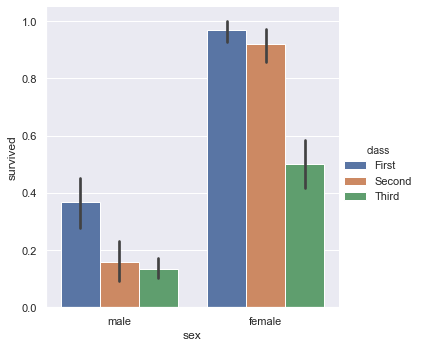

In [5]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

#### Box plot

- Based on robust measures (quartiles), see Sec 1.3.2 below.

<!-- <img src="assets/Boxplot_vs_PDF.svg" type="application/pdf" width="40%"/> -->

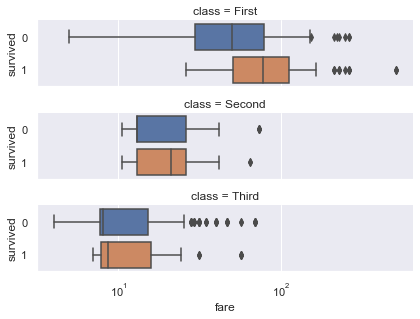

In [6]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

#### Scatter plot

#### Histogram

$$B_i = [L+(i-1)h, L+ih) \quad i = 1, \ldots, k$$

- To visualise whold dataset, $L \leq \min (x_1, \ldots, x_n)$ and $L+kh \geq \max (x_1, \ldots, x_n)$
- Different starting values lead to differently looking histograms

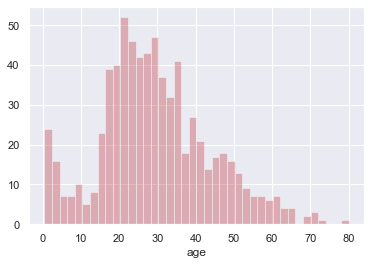

In [7]:
sns.distplot(titanic.age, bins=40, kde=False, color="r");

#### Kernel density plot

$$\hat p(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - x_i)$$

- Kernel: $\displaystyle \int K_h(x) \mathrm dx = 1$
- Bandwidth $h$: $\displaystyle K_h(x) = \frac{1}{h}K(\frac{1}{h})$
- Gaussian kernel: $\displaystyle K_h (\xi) = \frac{1}{\sqrt{2 \pi h^2}} \exp \left( -\frac{\xi^2}{2h^2} \right)$

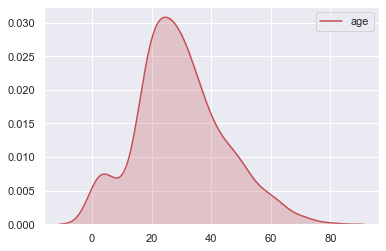

In [8]:
sns.kdeplot(titanic.age, shade=True, color="r")

#### Violin plot

- Combination of [box plot](#Box-plot) (robust) and [kernel density plot](#Kernel-density-plot) (non-robust but informative)

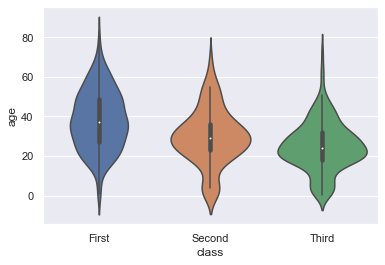

In [9]:
ax = sns.violinplot(x="class", y="age", data=titanic)

### Data Preprocessing:

#### Standardisation:

Normalising data to have 0 (sample) mean and unit (sample) variance:

* Centering Matrix:
    $$C_n = I_{n} - \frac{1}{n} 1_n 1_n^{T}$$
    * Where, $1_n = [1, 1, \dots, 1]^T$
    * Multiplying it from 
        * right: removes sample mean of each row, i.e., $X = \tilde{X}C_{n}$
        * left: removes sample mean of each column

#### 1.3.2 Outlier Detection:
* Tukey's fences: $[Q_1 - k(Q_3 - Q_1), Q_3 + k(Q_3 - Q_1)] = [Q_1 - k \times IQR, Q_3 + k \times  IQR]$
    * Typically, $k = 1.5$ for outlier removal

<div style="width:50%;height:50%">
<div style="text-align:center">
    
![Box Plot for outliers removal](assets/Boxplot_vs_PDF.svg "Outlier detection example")
    
</div>
</div>


### Lab for Chapter.1

<!-- {% iframe https://zengzhanhang.github.io/Documents/DME/01_Lab_1_Visualisation_solution.html 100% 500 sandbox="allow-scripts" %} -->

<iframe width="100%" height="550" frameborder="0" scrolling="yes" marginheight="0" marginwidth="0" src="https://zengzhanhang.github.io/Documents/DME/01_Lab_1_Visualisation_solution.html" style="border: 1px solid black" sandbox="allow-scripts"></iframe>

## Principal Component Analysis(PCA)

### PCA by Variance Maximisation

#### Sequential Approach

Principal Component(PC) direction: $\boldsymbol{w}$, projected data: $\boldsymbol{w}^{T} \boldsymbol{x}$

* The First Principal Component Direction:

\begin{aligned}
& \underset{\boldsymbol{w_{1}}}{\text{maximise}}
& & \boldsymbol{w_{1}}^T \Sigma \boldsymbol{w_{1}} = Var(z_{1}) \\
& \text{subject to}
& & ||\boldsymbol{w_{1}} = 1||
\end{aligned}

According to the eigenvalue decomposition of convariance matrix $\Sigma$: $\Sigma = U \Lambda U^{T}$

Let $\boldsymbol{w_{1}} = \sum_{i=1}^{n} a_{i} \boldsymbol{u_{i}} = U \boldsymbol{a}$, then 

\begin{aligned}
& \boldsymbol{w_{1}}^T \Sigma \boldsymbol{w_{1}} = \sum_{i=1}^{n} a_{i}^{2} \lambda_{i} \\
& ||\boldsymbol{w_{1}}|| = \boldsymbol{w_{1}}^{T} \boldsymbol{w_{1}} = \sum_{i=1}^{n} a_{i}^{2} = 1
\end{aligned}

Thus, the optimisation problem can be written as: 
    
\begin{aligned}
& {\text{maximise}}
& & \sum_{i=1}^{n} a_{i}^{2} \lambda_{i} \\
& \text{subject to}
& & \sum_{i=1}^{n} a_{i}^{2} = 1
\end{aligned}

$\boldsymbol{a} = (1, 0, \dots, 0)^T$  is the unique solution, if $lambda_{1} > \lambda{i}$.

So the first PC direction is 
    
$$\boldsymbol{w_{1}} = U \boldsymbol{a} = \boldsymbol{u_{1}}$$

, where the first PC direction given by the first eigen vector, $\boldsymbol{u_{1}}$, of  $\Sigma$  corresponding to the first(largest) eigen value $\lambda_{1}$.

* $Var(z_{1})= \boldsymbol{w_{1}}^T \Sigma \boldsymbol{w_{1}} = \lambda_{1}$
* $\mathbb{E}(z_{1}) = \mathbb{E}(\boldsymbol{w_{1}}^{T} \boldsymbol{x}) = \boldsymbol{w_{1}}^{T} \mathbb{E}(\boldsymbol{x}) = 0$
* First PC scores: $\boldsymbol{z_{1}}^{T} = \boldsymbol{w_{1}}^{T} X_{d \times n}$

* Subsequent PC Direction $\boldsymbol{w_{m}}$:

\begin{aligned}
& \underset{\boldsymbol{w_{m}}}{\text{maximise}}
& & \boldsymbol{w_{m}}^T \Sigma \boldsymbol{w_{m}} \\
& \text{subject to}
& & ||\boldsymbol{w_{m}} = 1|| \\
& 
& & \boldsymbol{w_{m}}^{T}\boldsymbol{w_{i}} = 0 & & i = 1, 2, \dots, m-1
\end{aligned}

Solution: similar to the previous procedure

$\boldsymbol{w_{m}} = \boldsymbol{u_{m}}$ is the m-th PC direction given by the m-th eigen vector of $\Sigma$ corresponding to the m-th largest eigen value $\lambda_{m}$.
* $Var(z_{m}) = \lambda_{m}$,  $\mathbb{E}(z_{m}) = 0$

* PCs (scores) uncorrelated:

\begin{aligned}
Cov(z_i, z_j) & = \mathbb{E}(z_i z_j) - \mathbb{E}(z_i) \mathbb{E}(z_j)\\
              & = \mathbb{E}(\boldsymbol{w_{i}}^{T} \boldsymbol{x} \boldsymbol{w_{j}}^{T} \boldsymbol{x}) - 0\\
              & = \boldsymbol{w_{j}}^{T} \mathbb{E}(\boldsymbol{x} \boldsymbol{x}) \boldsymbol{w_{j}}^{T}\\
              & = \boldsymbol{w_{j}}^{T} \Sigma \boldsymbol{w_{j}}^{T} \\
              & = \boldsymbol{e_{i}}^T U^T U \Lambda U^T U \boldsymbol{e_{j}} \\
              & = 0
\end{aligned}

* Fraction of variance explained $= \frac{\sum_{i}^{k} \lambda_{i}}{\sum_{i}^{d} \lambda_{i}}$
    * how much variability in data is captured by the first k principal components.

#### Simultaneous Approach

$$
\begin{aligned}
& \text{maximise}
& & \sum_{i=1}^{k}\boldsymbol{w_{i}}^T \Sigma \boldsymbol{w_{i}} \\
& \text{subject to}
& & ||\boldsymbol{w_{i}} = 1|| & & i = 1, 2, \dots, m-1\\
& 
& & \boldsymbol{w_{i}}^{T}\boldsymbol{w_{j}} = 0 & & i \neq j
\end{aligned}
$$


* Subtle technical point: the sequential approach corresponds to solving this optimisation problem in greedy manner(algorithm), which doesn't guarantee to yield optimal solution.
* However, sequential approach and simultaneous yield same results.

### PCA by Minimisation of Approximation Error

* Projection Matrix: 
$$
P = \sum_{i=1}^{k}\boldsymbol{w_{i}} \boldsymbol{w_{i}}^{T} = W_{k} W_{k}^{T}
$$
, where $W_{k} = (\boldsymbol{w_{1}}, \dots, \boldsymbol{w_{k}})$ is $d \times k$ matrix .

* Approximating $\boldsymbol{x}$ into subspace $\boldsymbol{\hat{x}} = P \boldsymbol{x} = \sum_{i=1}^{k}\boldsymbol{w_{i}} \boldsymbol{w_{i}}^{T} \boldsymbol{x}$
    
* Approximation Error: $\mathbb{E}||\boldsymbol{x} - P \boldsymbol{x}||^2 = \mathbb{E}||\boldsymbol{x} - W_{k} W_{k}^T \boldsymbol{x}||^2 = \mathbb{E}||\boldsymbol{x} - \sum_{i=1}^{k}\boldsymbol{w_k} \boldsymbol{w_k}^T \boldsymbol{x}||^2$ 

* Optimisation Problem: 

\begin{aligned}
& \text{minimise}
& & \mathbb{E}||\boldsymbol{x} - \sum_{i=1}^{k}\boldsymbol{w_k} \boldsymbol{w_k}^T \boldsymbol{x}||^2 \\
& \text{subject to}
& & ||\boldsymbol{w_{i}} = 1|| & & i = 1, 2, \dots, k\\
& 
& & \boldsymbol{w_{i}}^{T}\boldsymbol{w_{j}} = 0 & & i \neq j
\end{aligned}

* So,
  *  the optimal PC directions $\boldsymbol{w_{i}}$ are the first k eigen vectors $\boldsymbol{u_{i}}$ of $\Sigma$
  * The optimal projection matrix is $P = U_k U_{k}^{T}$
  * $\boldsymbol{\hat{x}} = P \boldsymbol{x} = U_{k} U_{k}^{T} \boldsymbol{x} = \sum_{i=1}^{k} \boldsymbol{u_{i}} \boldsymbol{u_{i}}^{T} \boldsymbol{x} = \sum_{i=1}^{k} \boldsymbol{u_{i}} z_{i}$
  * $\mathbb{E}||\boldsymbol{x} - U_{k} U_{k}^T \boldsymbol{x}||^2 = \sum_{i=1}^{d} \lambda_{i} - \sum_{i=1}^{k} \lambda_{i} = \sum_{i=k+1}^{d} \lambda_{i}$, which means minimising expected error = maximising variance explained.

* Relative Approximation Error: 
$$
\frac{\mathbb{E}||\boldsymbol{x} - U_{k} U_{k}^T \boldsymbol{x}||^2}{\mathbb{E}||\boldsymbol{x}||^2} = 1 - \frac{\sum_{i=1}^{k} \lambda_{i}}{\sum_{i=1}^{d} \lambda_{i}} = 1 - \text{fraction of variance explained}
$$

### PCA by Low Rank Matrix Approximation

#### Approximation from Data Matrix

* Let $X_{d \times n} = (\boldsymbol{x_1}, \boldsymbol{x_2}, \dots, \boldsymbol{x_n})$, where $\boldsymbol{x}$ is $d \times 1$ matrix (d-dimension). 
* Express $X$ via its Singular Value Decomposition(SVD): $X = U S V^{T}$
  * , where $U_{d \times d}$ and $V_{n \times n}$ are orthonormal. $S$ is zero everwhere, but first r diagonal elements.
* Optimisation Problem:

\begin{aligned}
& \text{minimise}
& & \sum_{ij} \left[ (X)_{ij} - (M)_{ij} \right]^2 = ||X - \hat{X}||_{F}  \\
& \text{subject to}
& & rank(M) = k\\
\end{aligned}


* So,
  * Optimal solution: $\hat{X} = \sum_{i=1}^{k} \boldsymbol{u_i} \boldsymbol{s_i} \boldsymbol{v_i}^{T} = U_K S_K V_K^T$ ((truncated singular value decomposition).
  * left singular vectors $\boldsymbol{u_i}$ are eigen vectors of $\Sigma$, so $\boldsymbol{u_i}$ are PC directions.
  * $s_i^2$ related to eigen values $\lambda_i$ of $\Sigma$:   $\lambda_i = \frac{s_i^2}{n}$. ([Proof in Appendix A](#1-s-i-2-related-to-eigen-values-lambda-i-of-Sigma))
  * PC scores: $\boldsymbol{z_i}^T = \boldsymbol{u_i}^T X = s_i \boldsymbol{v_i}^T$
    * Proof: $\boldsymbol{z_i}^T = \boldsymbol{u_i}^T X = \boldsymbol{u_i}^T U S V^T = \boldsymbol{u_i}^T \sum_{j=1}^{r}\boldsymbol{u_j} s_j \boldsymbol{v_j}^T = s_i \boldsymbol{v_i}^T$

#### Approximation from Sample Covariance Matrix
* Optimisation Problem:

\begin{aligned}
& \text{minimise}
& & ||\Sigma - M||_{F}  \\
& \text{subject to}
& & rank(M) = k\\
& 
& & M^T = M
\end{aligned}

* Optimal solution: $M = \hat{\Sigma} = U_k \Lambda_k U_k^T = \Sigma^T$, i.e., $\sum_{i=1}^{k}\lambda_i \boldsymbol{u_i} \boldsymbol{u_i}^T$


#### Approximation from Gram Matrix
* Gram Matrix:
  $$G = X^T X \text{, where} (G)_{ij} = \boldsymbol{x_i}^T\boldsymbol{x_j}$$
  * Gram Matrix is positive semi-definite

* According the SVD of $X$:
  $$
  G = X^T X = (USV^T)^T(USV^T) = V S^T U^T U S V^T = VS^T SV^T = V \tilde{\Lambda} V^T = \sum_{i=1}^{n} s_i^2 \boldsymbol{v_i} \boldsymbol{v_i}^T
  $$

* Thus, the best rank k approximation of $G$ is $\hat{G} = \sum_{i=1}^{k} \boldsymbol{v_i} s_i^2  \boldsymbol{v_i}^T$.
* Denote $\tilde{\Lambda} = S^T S$ is the top k eigen value of $G$, $V_k = (\boldsymbol{v_1}, \boldsymbol{v_2}, \dots, \boldsymbol{v_k})_{n \times k}$
  $$
  Z_k = \sqrt{\tilde{\Lambda}_k} V_k^T
  $$

#### Probabilistic PCA (PPCA)
* Advantages:
    1. PPCA can samples artificial data points (generative model).
    2. Formulation allows us to deal with missing data.

* Probabilistic Model:

$$
Z \sim \mathcal{N}(0,\,I_k)\\
\epsilon \sim \mathcal{N}(0, \, \sigma^2 I_d)\\
\underset{d \times 1}{\boldsymbol{x}} = \underset{d \times k}{W} \; \underset{k \times 1}{\boldsymbol{z}} + \underset{d \times 1}{\boldsymbol{\mu}} + \underset{d \times 1}{\boldsymbol{\epsilon}}
$$

* Joint, Conditional and Observation Distribution
  * Conditional Distribution:
  
    $$
    p(\boldsymbol{x}|\boldsymbol{z}) = \mathcal{N}(\boldsymbol{x};\; W \boldsymbol{z} + \boldsymbol{\mu},\; \sigma^2I_{d})
    $$

  * Joint Distribution:
  
    \begin{aligned}
    p(\boldsymbol{z},\; \boldsymbol{x}) & = p(\boldsymbol{x}|\boldsymbol{z})p(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{x};\; W \boldsymbol{z} + \boldsymbol{u},\; \sigma^2I_{d}) \mathcal{N}(\boldsymbol{z};\; 0,\; I_k)\\
    & = \frac{1}{const}exp \left[ -\frac{1}{2} [(\boldsymbol{x} - W \boldsymbol{z} - \boldsymbol{\mu})^{T} (\frac{1}{\sigma^2}I_{d}) (\boldsymbol{x} - W \boldsymbol{z} - \boldsymbol{\mu}) + \boldsymbol{z}^{T} \boldsymbol{z}] \right]
    \end{aligned}

> **Important Equations:**
>
> - For multivariate normal distribution: 
>
>\begin{aligned}
-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}-\boldsymbol{\mu}) & = -\frac{1}{2}\boldsymbol{x}^T \Sigma^{-1} \boldsymbol{x} + \boldsymbol{x}^{T} \Sigma^{-1}\mu + const\\
  & = -\frac{1}{2}\boldsymbol{x}^T A \boldsymbol{x} + \boldsymbol{x}^{T} \xi + const
\end{aligned}

Thus, $\Sigma = A^{-1}$ and $\boldsymbol{\mu} = \Sigma \  \xi$  .

* Observation Distribution:

$$
p(\boldsymbol{x}) = \mathcal{N}(\boldsymbol{x}; \; \boldsymbol{\mu}, \; W W^{T} + \sigma^2 I)
$$

* Maximum Likelihood:
  The maximum likelihood solutions are shown by [Tipping and Bishop, 1999](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/1467-9868.00196): 
  
$$
W_{ML} = U_k (\Lambda_k - \sigma^2 I)^{\frac{1}{2}} R\\
\sigma_{ML}^2 = \frac{1}{d-k} \sum_{i=k+1}^{d}\lambda_{i}
$$

* $U_k$   are $k$ principal eigenvectors of $\hat{\Sigma} = Cov(X) = \frac{1}{n}X X^T$  .
* $\Lambda_k$   is diagonal matrix with eighenvalues.
* $R$   is arbitrary orthogonal matrix, interpreted as a rotation in the latent space, indicating not unique solutions.
* Another option to find $W$ and $\sigma^2$ is EM algorithm.

* Relation to PCA:

    * The closest thing to PCA mapping is the posterior distribution $p(\boldsymbol{z}| \; \boldsymbol{x})$. To find it, we can fix $\boldsymbol{x}$ as a constant in the joint distribution $p(\boldsymbol{z},\; \boldsymbol{x})$ and use the **important equation** just mentioned above.
  
$$
p(\boldsymbol{z}| \; \boldsymbol{x} = \mathcal{N}(\boldsymbol{z}; \; M^{-1} W^{T} (\boldsymbol{x} - \boldsymbol{\mu}), \; \sigma^2 M^{-1})
$$

, where $M = W^T W + \sigma^2 I$  .

* PCA projection $\hat{\boldsymbol{x}}$: 
  
$$
\hat{\boldsymbol{x}} = W_{ML} \mathbb{E}(\boldsymbol{z}|\; \boldsymbol{x}) = W_{ML} M_{ML}^{-1} W_{ML}^{T} \boldsymbol{x}
$$  

, where $M_{ML} = W_{ML}^{T} W_{ML} + \sigma^{2}I \;$ and $\; W_{ML} = U_k (\Lambda_k - \sigma^2 I)^{\frac{1}{2}}$  .
  
* For $\sigma^2 \rightarrow 0$, we recover the PCA projection $\hat{\boldsymbol{x}}$:
  
\begin{aligned}
W_{ML} M_{ML}^{-1} W_{ML}^{T} \boldsymbol{x} 
& = U_k \Lambda_k^{1/2} ((U_k \Lambda_k^{1/2})^T (U_k \Lambda_k^{1/2}))^{-1} (U_k \Lambda_k^{1/2})^{T} \boldsymbol{x}\\
& = U_k U_k^T \boldsymbol{x}
\end{aligned}


### Lab for Chapter.2

<iframe width="100%" height="550" frameborder="0" scrolling="yes" marginheight="0" marginwidth="0" src="https://zengzhanhang.github.io/Documents/DME/02_Lab_2_Principal_component_analysis_solution.html" style="border: 1px solid black" sandbox="allow-scripts"></iframe>

## Dimensionality Reduction

### Linear Dimensionality Reduction

#### From Data Matrix

Observed (uncentered) data: $\tilde{X} = (\boldsymbol{x_1}, \boldsymbol{x_2}, \dots, \boldsymbol{x_n})_{d \times n}$

Center data: $X =  \tilde{X} C_n$ , where $C_n = I_{n} - \frac{1}{n} 1_n 1_n^{T}\ $  .

* **Option 1** - compute PC scores via eigen values decomposition:

    \begin{aligned}
    \Sigma & = \frac{1}{n}X X^T = U \Lambda U^T
    \end{aligned}
    
    * Denote $U_k$ with the first $k$ eigen vectors of $\Sigma$ corresponding to the top $k$ eigen values: $U_k = (\boldsymbol{u_1}, \boldsymbol{u_2}, \dots, \boldsymbol{u_k})_{d \times k}$

    * PC scores:

    \begin{aligned}
    \underset{k \times 1}{\boldsymbol{z}_i} = \underset{k \times d}{U_k^T} \; \underset{d \times 1}{\boldsymbol{x}_i} , & & \underset{k \times n}{Z} = \underset{k \times d}{U_k^T} \; \underset{d \times n }{X}
    \end{aligned}


* **Option 2** - compute PC scores via Gram Matrix:

    \begin{aligned}
    G = X^T X = (USV^T)^T(USV^T) = V S^T U^T U S V^T = VS^T SV^T = V \tilde{\Lambda} V^T 
    \end{aligned}
    
    \begin{aligned}
    \underset{k \times n}{Z} = \underset{k \times k}{\sqrt{\tilde{\Lambda}}} \underset{k \times n}{V_k^T}, & & V_k = (\boldsymbol{v}_1, \dots, \boldsymbol{v}_k)
    \end{aligned}

#### From Inner Product

$$
\begin{aligned}
(G)_{ij} = \boldsymbol{x}_i^T \boldsymbol{x}_j & & X = \tilde{X} C_n & & \tilde{G} = \tilde{X}^T \tilde{X} 
\end{aligned}\\
G = X^T X = C_n \tilde{X}^T \tilde{X} C_n = C_n \tilde{G} C_n
$$


#### From Distance Matrix

If only given squared distance $\delta_{ij}^2$ between data points $\tilde{\boldsymbol{x_i}}$ and $\tilde{\boldsymbol{x_j}} \ $.

$$
\delta_{ij}^2 = ||\tilde{\boldsymbol{x_i}} - \tilde{\boldsymbol{x_j}}||^2 = (\tilde{\boldsymbol{x_i}} - \tilde{\boldsymbol{x_j}})^T (\tilde{\boldsymbol{x_i}} - \tilde{\boldsymbol{x_j}})
$$

Distance Matrix $\Delta$ contains elements $\delta_{ij} \ $.

$$
\delta_{ij}^2 = ||(\tilde{\boldsymbol{x_i}} -\mu) - (\tilde{\boldsymbol{x_j}} - \mu)||^2 = ||\boldsymbol{x_i} - \boldsymbol{x_j}||^2 = (\boldsymbol{x_i} - \boldsymbol{x_j})^T(\boldsymbol{x_i} - \boldsymbol{x_j})\\
\delta_{ij}^2 = ||\boldsymbol{x_i}||^2 + ||\boldsymbol{x_j}||^2 -2\boldsymbol{x_i}^T \boldsymbol{x_j}
$$

Center the distance:

$$
(C_n \Delta C_n)_{ij} = (\Delta C_n)_{ij} - \frac{1}{n} \sum_{i} (\Delta C_n)_{ij} = - 2\boldsymbol{x_i}^T \boldsymbol{x_j}\\
G = -\frac{1}{2}C_n \Delta C_n
$$


### (Non-linear) Dimensionalisty Reduction via Kernel PCA

To obtain **new data matrix** $\Phi$ using the transforming function $\phi(\boldsymbol{x}_i)$.

$$
\Phi = (\phi_1, \phi_2, \dots, \phi_n) = (\phi(\boldsymbol{x}_1), \phi(\boldsymbol{x}_2), dots, \phi(\boldsymbol{x}_n))
$$

**Kernel Trick**: inner product of some functions can be computed as:

$$
\phi(\boldsymbol{x}_i)^T \phi(\boldsymbol{x}_j) = k(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$

**uncentered Gram Matrix** $G$ of $\Phi$ with elements $(\tilde{G})_{ij}$:

$$
\tilde{G})_{ij} = \phi(\boldsymbol{x}_i)^T \phi(\boldsymbol{x}_j) = k(\boldsymbol{x}_i, \boldsymbol{x}_j)
$$

**Example Kernel**:
* Polynomial kernel: $k(\boldsymbol{x}_i, \boldsymbol{x}_j) = (\boldsymbol{x}_i^T \boldsymbol{x}_j)^\alpha$
* Gaussian kernel: $k(\boldsymbol{x}_i, \boldsymbol{x}_j) = exp \left( - \frac{||\boldsymbol{x_i} - \boldsymbol{x}_j||^2}{2 \sigma^2} \right)$

Then applying methods in [Sec 3.1.2](#From-Inner-Product) and [Sec 3.1.1](#From-Data-Matrix) to compute PC scores.


### Multidimensional Scaling (MDS)

#### Metric MDS

Assumption: the numerical values of dissimilarities (e.g. Euclidean distance) carry information.

Optimisation Problem:

\begin{aligned}
\underset{\mathbf z_1, \ldots, \mathbf z_n}{\text{minimise}} \quad \sum_{i<j} w_{ij} ( \| \mathbf z_i - \mathbf z_j \| - \delta_{ij})^2
\end{aligned}

<!-- \begin{aligned}
\text{minimise}& & w_{ij}(||\boldsymbol{z}_i - \boldsymbol{z}_j|| - \delta_{ij})^2
\end{aligned} -->


* $\delta_{ij}$ are dissimilarities between two data items, e.g. Euclidean Distance.
* $||\boldsymbol{z}_i - \boldsymbol{z}_j|| \ $ is Euclidean distance betweeen $\boldsymbol{z}_i \ $ and $\ \boldsymbol{z}_j \ $, i.e., $\ \sqrt{(\boldsymbol{z}_i - \boldsymbol{z}_j)^T (\boldsymbol{z}_i - \boldsymbol{z}_j)} \ $.
* $w_{ij} \ $ are some weights specified by users.
* if $\ w_{ij} = \frac{1}{\delta_{ij}} \ $, the MDS is called Sammon nonlinear mapping emphasing the faithful representation of samll dissimilarities.
* Solved by gradient descent.

#### Non-metric MDS

Assumption: only relationship between $ \delta_{ij} $ matters, i.e., whether $ \delta_{12} > \delta_{13} $ or $ \delta_{12} < \delta_{13} $.

Optimisation Problem:

\begin{aligned}
\underset{\boldsymbol{z_1}, \boldsymbol{z_2}, \dots, \boldsymbol{z_n}, f}{\text{minimise}}& & \sum_{i \le j} w_{ij} (||\boldsymbol{z}_i - \boldsymbol{z}_j|| - f(\delta_{ij}))^2
\end{aligned}

* Actual values of $\ \delta_{ij} \ $ do not matter.
* $f \ $ is monotonic (non-decreasing) function converting dissimilarities to distances.
* Solved by iterating between optimisation w.r.t $\ \boldsymbol{z}_i \ $ and optimisation w.r.t $\ f \ $, which can be done by regression.

#### Classical MDS:
Assumption: numerical values of $\ \delta_{ij} \ $ matter.

**Dissimilarities** $\ \delta_{ij} \ $ are (squared) Eucldiean distance between some unknown vectors.

**Distance matrix** $\ \Delta \ $ is formed by $\ \delta_{ij} \ $

Using the method in [Sec 3.1.3](#From-Distance-Matrix):

1. Compute hypothetical Gram matrix $\ G' \ $ of unknown centered data points.
    
\begin{aligned}
G = -\frac{1}{2}C_n \Delta C_n ,& & C_n = I_{n} - \frac{1}{n} 1_n 1_n^{T}
\end{aligned}

2. Compute top k eigen values $\ \sigma_k^2 \ $ and corresponding eigen vectors $\ \boldsymbol{v}_k \ $ of $\ G \ $ and form $\ \tilde{\Lambda}_k = diag(\sigma_1^2, \sigma_2^2, \dots, \sigma_k^2) \ $ and $\ V_k = (\boldsymbol{v}_1, \boldsymbol{v}_2, \dots, \boldsymbol{v}_k)_{n \times k}$

3. $\underset{k \times n}{Z} = \underset{k \times k}{\sqrt{\tilde{\Lambda}}} \; \underset{k \times n}{V_k^T}$

    $\Delta \ $ is not necessary positive semi-definite, thus, some eigen values might be negative.

**Solution**: choose $\ k \ $small enough to avoid negative eigen values.

Classical MDS solution for $\ k' < k \ $ is directly given by the first $\ k' \ $ corordinates of $\ k \ $ dimensional $\ \boldsymbol{z} \ $.

* Alternative approximate negative definite $\ \Delta \ $ by:
    
\begin{aligned}
& \text{minimise}& & ||(-\frac{1}{2}C_n \Delta C_n) - M^T M||_F\\
& \text{subject to}& & rank(M^T M) = k
\end{aligned}
    

#### Isometric Features Mapping (Isomap)
Steps of Isomap
1. Construct the neighbourhood graph via '*k nearest neighbour*' or *all data points within a certain (Euclidean) distance*.
2. Construct the shortest path (distances) as geodesic distance
3. Construct the low dimensional embeding of these data via MDS so as to represent these data.

**Geodesic distance** is measured by the shortest distance between them when only allowed to travel on the data manifold from one neighbouring data point to the next.

Isomap well represents the circular structure when learned graph is connected.


### Lab for Chapter.3

<iframe width="100%" height="550" frameborder="0" scrolling="yes" marginheight="0" marginwidth="0" src="https://zengzhanhang.github.io/Documents/DME/03_Lab_3_Unsupervised_dimensionality_reduction_solution.html" style="border: 1px solid black" sandbox="allow-scripts"></iframe>

## Predictive Modelling and Generalization

### Prediction and Training Loss

#### Prediction Loss

$$
\mathcal{J}(h) = \mathbb{E}_{\hat{y}, \ y} \left[ \mathcal{L}(\hat{y}, \ y) \right] = \mathbb{E}_{\boldsymbol{x}, \ y} \left[ \mathcal{L}(h(\boldsymbol{x}), \ y) \right]
$$

* The term $\ \mathbb{E}_{\boldsymbol{x}, \ y} \ $ means expectation w.r.t $\ p(\boldsymbol{x},\ y) \ $ .

#### Training Loss

$$
\mathcal{J}_{\lambda}^{*} = \underset{\theta}{min} \ \mathcal{J}_{\lambda}(\theta) = \frac{1}{n} \sum_{i=1}^{n}  \left[ \mathcal{L}(h(\boldsymbol{x}_i; \ \theta), \ y_i) \right]
$$


### Generalisation Performance

#### Generalisation Loss

For **prediction function**

$$
\mathcal{J}(\hat{h}) = \mathbb{E}_{\boldsymbol{x}, \ y} \left[ \mathcal{L}(\hat{h}(\boldsymbol{x}), \ y) \right]
$$

* Done with held-out data

For **algorithm**

$$
\bar{\mathcal{J}}(\mathcal{A}) = \mathbb{E}_{D^{train}}\left[ \mathcal{J}(\hat{h}) \right] = \mathbb{E}_{D^{train}}\left[ \mathcal{J}(\mathcal{A}(D^{train})) \right]
$$

See [DME Lecture Notes](/assets/lecture-notes.pdf) for more details.


#### Overfitting and Underfitting

**Overfitting**: Reducing the model complexity, the prediction loss decreases.

**Underfitting**: Increasing the model complexity, the prediction loss decreases.  

* Solutions: **Model Selection** or **Regularisation** . 

* Regularisation: 

    \begin{aligned}
    & \text{minimise} & & \mathcal{J}_{\boldsymbol{\lambda}}(\boldsymbol{\theta}) + \lambda_{reg} R(\boldsymbol{\theta})
    \end{aligned}

    * L2 regularisation: $\; \; \; R(\boldsymbol{\theta}) = \sum_{i} \theta_i^2 \; $
    * L1 regularisation: $\; \; \; R(\boldsymbol{\theta}) = \sum_{i} |\theta_i| \; $
    
* Either **model complexity** and **size of training data** matter generalisation performance, See [4.2.3 Example](/assets/example1.pdf) on DME Lecture Notes.

### Estimating the Generalisation Performance

We typically need to estimate the generalisation performance twice: Once for hyperparameter selection, and once for ﬁnal performance evaluation.

#### Methods for Estimating the Generalisation Performance

##### **Held-out Approach**

Prediction function:

\begin{aligned}
\hat{h} = \mathcal{A}(D^{train})
\end{aligned}

Prediction Loss on Testing/ Validation Sets $\ \tilde{D} \ $.

\begin{aligned}
\hat{\mathcal{J}}(\hat{h}: \  \tilde{D}) = \frac{1}{n}\sum_{i=1}^{n}\mathcal{L} \left( \hat{h}(\tilde{\boldsymbol{x}}_i, \  \tilde{y}_i) \right)
\end{aligned}


1. Common split ratios $\ n/ \tilde{n} \ $: 60/40, 70/30 or 80/20 .
2. If the number of (hyper-)parameters is large, let more data on training set.
3. Split randomly.
4. Stratification: classes are presented in same proportion  in both sets.
5. **Drawback**: estimated prediction loss may varies strongly in different $\ \tilde{D} \ $, unless $\ \tilde{n} \ $ is large. **Solved by Cross-Validation**

##### **Cross-Validation  Approach**

<div style="text-align:center">
    
![Sketch of K-fold cross-validation for K = 5.](assets/cross_validation.png "Sketch of K-fold cross-validation for K = 5.")
</div>

1. **K-fold**: Construct k pairs of $\ D^{train} \ $ and $\ D^{val} \ $.
    
    \begin{aligned}
    & D^{train} = D_{i \neq k} & & D^{val} = D_k
    \end{aligned}
    
    
2. **K Prediction functions**: obtained by using k training sets . 
   
    \begin{aligned}
    \hat{h}_k = \mathcal{A}(D_{k}^{train})
    \end{aligned}
    
    

3. **K performance Estimations**: evaluated on k validation sets .
   
    \begin{aligned}
    \hat{\mathcal{J}}_k = \hat{\mathcal{J}}(\hat{h}_k : \ D_k^{val})
    \end{aligned}
    
    

4. **Cross Validation (CV) Score**: averaging all k $\ \hat{\mathcal{J}}_k \ $
   
    \begin{aligned}
    CV = \frac{1}{K} \sum_{k=1}^{K}\hat{\mathcal{J}}_k \left(\mathcal{A} (D_k^{train}: D_k^{val}) \right) = \hat{{\bar{\mathcal{J}}}} (\mathcal{A})
    \end{aligned}
    
    
* Estimate **Variability** of CV score
    
    \begin{aligned}
    Var(CV) \approx \frac{1}{k} Var(\hat{\mathcal{J}}_k), &  & Var{\hat{\mathcal{J}}} = \frac{1}{k} = (\hat{\mathcal{J}}_k - CV) ^2  
    \end{aligned}
    
    

* **LOOCV** (Leave-One-Out Cross-Validation): $\ D^{val} \ $ contains only one data point.
    * Generally expensive, but for some problems, the computation can be done quickly. For a further discussion of the choice of K, see e.g. Section 7.10 in the textbook by [Hastie, Tibshirani, and Friedman (2009)](https://web.stanford.edu/~hastie/Papers/ESLII.pdf).

#### Hyperparameters Selection and Performance Evaluation: 

##### **Option 1** - Two Times Held-out
1. Split off some testing data to evaluate the final performance., e.g. typically, $\ D^{test} \ $ = 20 % of $\ D \ $.
2. Split remaining data into $\ D^{train} \ $, $\ D^{val} \ $, e.g. 80/20 ratio.
3. Tuning parameters $\ \boldsymbol{\lambda} \ $ on $\ D^{train} \ $, return a set of $\ \hat{\boldsymbol{\lambda}} \ $ .

    \begin{aligned}
    \hat{h}_{\boldsymbol{\lambda}} = \mathcal{A}_{\boldsymbol{\lambda}} (D^{train}) 
    \end{aligned}
        
4. Compute prediction loss $\ PL({\boldsymbol{\lambda}}) \ $ on $\ D^{val} \ $.
    
    \begin{aligned}
    PL(\boldsymbol{\lambda}) = \hat{\mathcal{J}} (\hat{h}_{\boldsymbol{\lambda}}: \ D^{val})
    \end{aligned}

    and choosing the $\ \boldsymbol{\lambda} \ $ by minimising $\ PL(\boldsymbol{\lambda}) \ $
    
    \begin{aligned}
    \hat{\boldsymbol{\lambda}} = \underset{\boldsymbol{\lambda}}{\text{argmin }} PL(\boldsymbol{\lambda})
    \end{aligned}
   
5. Using $\ \hat{\boldsymbol{\lambda}} \ $, re-estimate $\ \boldsymbol{\theta} \ $ on the union of $\ D^{train} \ $ and $\ D^{val} \ $.
    
    \begin{aligned}
    \hat{h} = \mathcal{A}_{\hat{\boldsymbol{\lambda}}} = \left( D^{train} U D^{val} \right)
    \end{aligned}
    
6. Compute prediction loss on $\ D^{test} \ $.
   
    \begin{aligned}
    \hat{\mathcal{J}} = \hat{\mathcal{J}}(\hat{h}:\ D^{test})
    \end{aligned}
    
7. Re-estimate $\ \hat{h} \ $ on all data $\ D \ $

##### **Option 2** - Cross-validation + Held-out
1. Split of $\ D^{test} \ $, e.g. $\ D^{test} \ $ = 20 % of $\ D \ $.
2. Compute CV score on remaining data $\ D^{train} \ $.
    
    $$
    EPL(\boldsymbol{\lambda}) = CV
    $$
    
3. Choose $\ \hat{\boldsymbol{\lambda}} = \underset{\boldsymbol{\lambda}}{\text{argmin }}EPL(\boldsymbol{\lambda}) \ $ 
4. Re-estimate $\ \boldsymbol{\theta} \ $ on $\ D^{train} \ $ using $\ \hat{\boldsymbol{\lambda}} \ $.
    
    $$
    \hat{h} = \mathcal{A}_{\boldsymbol{\lambda}} (D^{train})
    $$
    
5. Compute prediction loss on $\ D^{test} \ $.
6. Re-estimate $\ \hat{h} \ $ on all data $\ D \ $

### Loss Functions in Predictive Models.

#### Regression


\begin{aligned}
& L(\hat{y},\ y) = \frac{1}{2}\left( \hat{y} - y \right)^2
& & \text{(Square Loss)}\\
& L(\hat{y},\ y) = | \hat{y} - y |
& & \text{(Absolute Loss)}\\
& L(\hat{y},\ y) = 
    \begin{cases}
        \frac{1}{2}\left( \hat{y} - y \right)^2 & \text{if } | \hat{y} - y |< \delta\\
        \delta | \hat{y} - y | - \frac{1}{2} \delta^2 & \text{otherwise}
    \end{cases}
& & \text{(Huber Loss)}
\end{aligned}


#### Classification - for Non-differentiable Loss Function

Assume k different classes, loss function $\ L(\hat{y}, \ y) \ $ can be represented as $\ k \times k \ $ matrix.

$$
L(\hat{y}, \ y) = 
\begin{bmatrix}
    L(1,1) & L(1,2) &  \dots  & L(1,k) \\
    L(2,1) & L(2,2) &  \dots  & L(2,k) \\
    \vdots & \vdots &  \ddots & \vdots \\
    L(k,1) & L(k,2) &  \dots  & L(k,k)
\end{bmatrix}
$$

* The diagonal $\ L(i,i) \ $ are zero as correct prediction.
* The off-diagonal $\ L(i,j) \ $ are positive: loss incurred when predicting 'i' instead of 'j'

**Zero-one loss:**

* If $\ L(i,\ j) = 1 \ $ for $\ i \neq j \ $, and 0 otherwise

$$
L(\hat{y}, \ y) = 
\begin{cases}
    1 & i \neq j\\
    0 & otherwise
\end{cases}
$$

* The expected prediction loss:

\begin{aligned}
\mathcal{J}(h) & = \mathbb{E}_{\boldsymbol{x}, \ y} L \left(h(\boldsymbol{x}), \ y)  \right)\\
& = \mathbb{E}_{\hat{y}, \ y} L \left(\hat{y}, \ y)  \right)\\
& = \sum_{i, j} L(i,\ j) p(i,\ j)\\
& = \sum_{i \neq j} p(i, \ j)\\
& = \mathbb{P}(y \neq \hat{y})
\end{aligned}

, where $\ p(i,\ j) = p(\hat{y} = i, \ y = j) \ $
* Known as 'missclassification rate'

**Binary classification:**

| $\hat y$ | $y$ | event | <div style="width:160px">joint probability $p(\hat y, y)$</div> | shorthand notation | <div style="width:auto">rate</div> | conditional probability $p(\hat{y}\lvert y)$ |
|:-:|:-:|:-:|:-:|:-:|--:|:-:|
| 1 | 1 | True Positive | $\mathbb P(\hat y=1, y=1)$ | $p(1,1)$ | TP rate<br>sensitivity, hit rate, recall | $\mathbb P(\hat{y}=1 \lvert y=1)$ |
| 1 | -1 | False Positive | $\mathbb P(\hat y=1, y=-1)$ | $p(1,-1)$ | FP rate<br>type 1 error, fall-out | $\mathbb P(\hat{y}=1 \lvert y=-1)$ |
| -1 | 1 | False Negative | $\mathbb P(\hat y=-1, y=1)$ | $p(-1,1)$ | FN rate<br>type 2 error | $\mathbb P(\hat{y}=-1 \lvert y=1)$ |
| -1 | -1 | True Negative | $\mathbb P(\hat y=-1, y=-1)$ | $p(-1, -1)$ | TN rate<br>specificity | $\mathbb P(\hat{y}=-1 \lvert y=-1)$ |

<!-- <div style="text-align:center">
    
![Possible events and their probabilities in binary classiﬁcation.](assets/binary_classification.png "Possible events and their probabilities in binary classiﬁcation.")
    
</div> -->

**Loss function penalising FP and FN rates:**

$$\mathbf L_{\hat y, y} = \begin{pmatrix}
0 & \frac{1}{\mathbb P(y=1)} \\
\frac{1}{\mathbb P(y=-1)} & 0 \\
\end{pmatrix}$$

- Expectation: $\displaystyle \mathcal J(h) = \sum_{i,j} L(i,j) p(i,j) = \mathrm{FPR} + \mathrm{FNR}$
- Not meaningful because optimal solution is $\hat y=-1$: $\mathrm{TPR}=0$


**Reciver Operating Characteristic curve ([ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic))**

* Minimising the false-positive (or false-negative) rate alone is not a very meaningful strategy: The reason is that the trivial classiﬁer $\ h(x) = \hat{y} = −1 \ $ would be the optimal solution. But for such a classiﬁer the true-positive rate would be zero. 

* ROC curve visualise a generally a trade-off between true-positive rate (**TPR**) and false-positive rates (**FPR**).

<div style="text-align:center">
    
![Plotting the false-positive rate (“cost”) of a classiﬁer versus its true-positive rate (“benefit”). Adapted from https://en.wikipedia.org/wiki/Receiver_operating_characteristic](assets/ROC.png "ROC curve")
    
</div>

#### Classification - for Differentiable Loss Functions 

For simplicity, we consider here binary classiﬁcation only. Let us assume that $\  \hat{y} ∈{−1,1} \ $ is given by 

$$
\hat{y}(\boldsymbol{x}) = sign(h(\boldsymbol{x}))
$$

, where $\ h(\boldsymbol{x})\ $ is real-valued.

$$
\text{correct classiﬁcation of } \boldsymbol{x} ⇐⇒ yh(\boldsymbol{x}) > 0. 
$$


* Loss Function: 

\begin{aligned}
& L(\hat{y},\ y) = 
    \begin{cases}
        1 & \text{if } y h(\boldsymbol{x} < 0)\\
        0 & \text{otherwise.}
    \end{cases}
& & \text{(Zero-One Loss)}\\
& L(\hat{y},\ y) = (h(\boldsymbol{x}) - y)^2 = (1 - y h(\boldsymbol{x}))^2
& & \text{(Square Loss)}\\
& L(\hat{y},\ y) = log \left( 1 + exp(- y h(\boldsymbol{x})) \right)
& & \text{(Log Loss)}\\
& L(\hat{y},\ y) = exp(- y h(\boldsymbol{x}))
& & \text{(Exponential Loss)}\\
& L(\hat{y},\ y) = max \left( 0, \ 1 - y h(\boldsymbol{x}) \right)
& & \text{(Hinge Loss)}\\
& L(\hat{y},\ y) = max \left( 0, \ 1 - y h(\boldsymbol{x}) \right)^2
& & \text{(Square Hinge Loss)}\\
& L(\hat{y},\ y) =
\begin{cases}
    - 4 y h(\boldsymbol{x}) & \text{if } y h(\boldsymbol{x}) < -1\\
    max \left( 0, \ 1 - y h(\boldsymbol{x}) \right)^2 & \text{otherwise}
\end{cases}
& & \text{(Huberised Square Hinge Loss)}
\end{aligned}


### Lab for Chapter.4

<iframe width="100%" height="550" frameborder="0" scrolling="yes" marginheight="0" marginwidth="0" src="https://zengzhanhang.github.io/Documents/DME/04_Lab_4_Performance_evaluation_model_selection_solution.html" style="border: 1px solid black" sandbox="allow-scripts"></iframe>

## Appendix A

### $s_i^2$ related to eigen values $\lambda_i$ of $\Sigma$
Assume $X$ centered, then, according the SVD of $X$, the covariance matrix is 


\begin{aligned}
\Sigma & = \frac{1}{n}X X^T \\
       & = \frac{1}{n}U S V^T (U S V^T)^T = \frac{1}{n} U (\frac{1}{n}S S^T) U^T\\
       & = U \Lambda U^T
\end{aligned}



## Reference
[1]: Michael E Tipping and Christopher M Bishop. “Probabilistic principal component analysis”. In: Journal of the Royal Statistical Society: Series B (Statistical Methodology) 61.3 (1999), pp. 611–622

[2]: T. Hastie, R. Tibshirani, and J.H. Friedman. The Elements of Statistical Learning. Springer, 2009. 

**Author:** Zhanhang Zeng, Chito Wong

**Licensing:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.